In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fbprophet import Prophet

In [3]:
## Qtde views página Wikipedia

# dataset = pd.read_csv('page_wikipedia.csv') # Colab
dataset = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/IA Expert/ML-e-DS-com-Python-de-A-a-Z/Bases de dados/page_wikipedia.csv') # Mac
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [4]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


array([[<AxesSubplot:title={'center':'views'}>]], dtype=object)

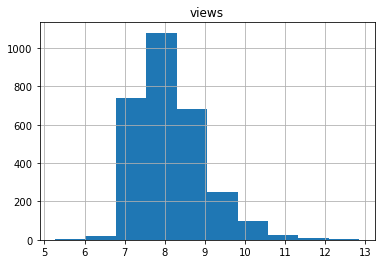

In [5]:
dataset.hist()

In [6]:
# renomear as colunas para o padrão do fbprophet
dataset = dataset.rename(columns={'date': 'ds', 'views': 'y'})

In [7]:
# colocando em ordem cronológica
dataset = dataset.sort_values(by='ds')

Modelo e previsões

In [8]:
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.31    0.00415855       247.015      0.7831      0.7831      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7994.53      0.010249        344.02           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       7995.33   5.91718e-05       165.006   4.517e-07       0.001      316  LS failed, Hessian reset 
     299       7997.26   0.000813407       209.659       6.754      0.6754      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8001.1   0.000792021       147.659      0.5991           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     488       8002.21   7.22552e-05    

           1      690   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       8003.64     0.0047848       521.672           1           1      814   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     628       8004.26   5.71296e-05       153.514   1.864e-07       0.001      890  LS failed, Hessian reset 
     699       8004.62    0.00078023       134.695           1           1      976   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     753       8004.75   5.63457e-07        75.462           1           1     1045   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [9]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [10]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.042185,8.156556,9.443205,8.042185,8.042185,0.803095,0.803095,0.803095,0.352287,0.352287,0.352287,0.450808,0.450808,0.450808,0.0,0.0,0.0,8.845280
1,2007-12-11,8.040639,8.013231,9.201783,8.040639,8.040639,0.553177,0.553177,0.553177,0.119643,0.119643,0.119643,0.433535,0.433535,0.433535,0.0,0.0,0.0,8.593816
2,2007-12-12,8.039093,7.773885,8.965361,8.039093,8.039093,0.350530,0.350530,0.350530,-0.066668,-0.066668,-0.066668,0.417197,0.417197,0.417197,0.0,0.0,0.0,8.389623
3,2007-12-13,8.037547,7.708939,9.020209,8.037547,8.037547,0.329990,0.329990,0.329990,-0.072250,-0.072250,-0.072250,0.402240,0.402240,0.402240,0.0,0.0,0.0,8.367537
4,2007-12-14,8.036001,7.739831,8.984555,8.036001,8.036001,0.319486,0.319486,0.319486,-0.069583,-0.069583,-0.069583,0.389069,0.389069,0.389069,0.0,0.0,0.0,8.355487


In [11]:
len(dataset), len(forecast)

(2905, 2995)

In [12]:
len(forecast)-len(dataset)

90

In [13]:
forecast.tail(90)
# additive_terms: regressão aditiva

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.558032,7.952803,9.154548,7.558032,7.558032,0.999927,0.999927,0.999927,-0.072250,-0.072250,-0.072250,1.072177,1.072177,1.072177,0.0,0.0,0.0,8.557959
2906,2016-01-22,7.557005,7.942891,9.199167,7.557005,7.557005,1.016903,1.016903,1.016903,-0.069583,-0.069583,-0.069583,1.086486,1.086486,1.086486,0.0,0.0,0.0,8.573909
2907,2016-01-23,7.555979,7.745736,8.968474,7.555979,7.555979,0.786621,0.786621,0.786621,-0.311717,-0.311717,-0.311717,1.098338,1.098338,1.098338,0.0,0.0,0.0,8.342599
2908,2016-01-24,7.554952,8.070771,9.319342,7.554952,7.554952,1.155624,1.155624,1.155624,0.048288,0.048288,0.048288,1.107337,1.107337,1.107337,0.0,0.0,0.0,8.710576
2909,2016-01-25,7.553925,8.474332,9.626755,7.553925,7.553925,1.465359,1.465359,1.465359,0.352287,0.352287,0.352287,1.113072,1.113072,1.113072,0.0,0.0,0.0,9.019284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.470747,6.286617,7.511790,7.439084,7.497163,-0.561025,-0.561025,-0.561025,-0.069583,-0.069583,-0.069583,-0.491442,-0.491442,-0.491442,0.0,0.0,0.0,6.909722
2991,2016-04-16,7.469720,6.049184,7.316562,7.437487,7.497087,-0.773069,-0.773069,-0.773069,-0.311717,-0.311717,-0.311717,-0.461352,-0.461352,-0.461352,0.0,0.0,0.0,6.696651
2992,2016-04-17,7.468693,6.490413,7.685418,7.435773,7.496843,-0.383374,-0.383374,-0.383374,0.048288,0.048288,0.048288,-0.431661,-0.431661,-0.431661,0.0,0.0,0.0,7.085319
2993,2016-04-18,7.467666,6.797393,8.074965,7.434202,7.496707,-0.050822,-0.050822,-0.050822,0.352287,0.352287,0.352287,-0.403110,-0.403110,-0.403110,0.0,0.0,0.0,7.416844


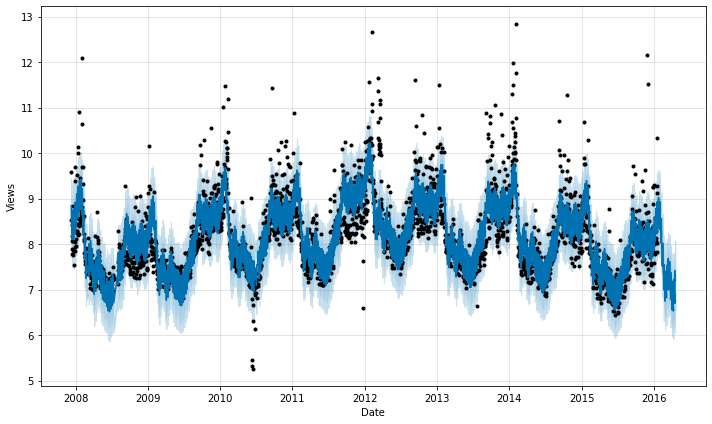

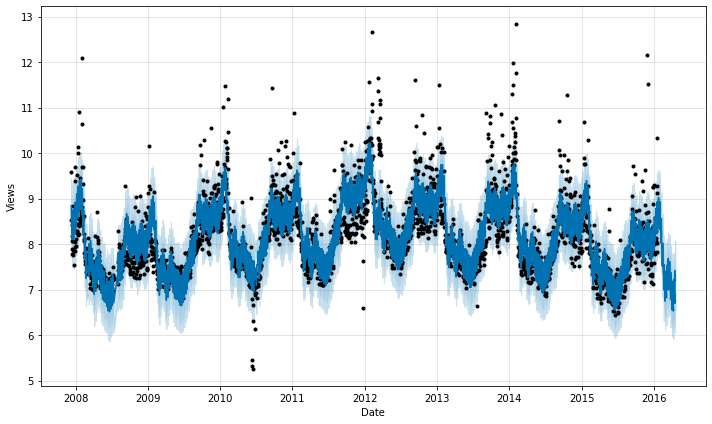

In [14]:
model.plot(forecast, xlabel='Date', ylabel='Views')

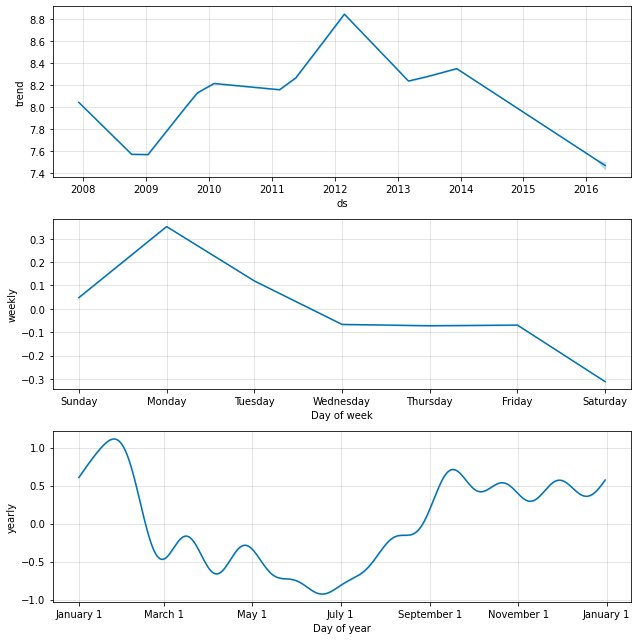

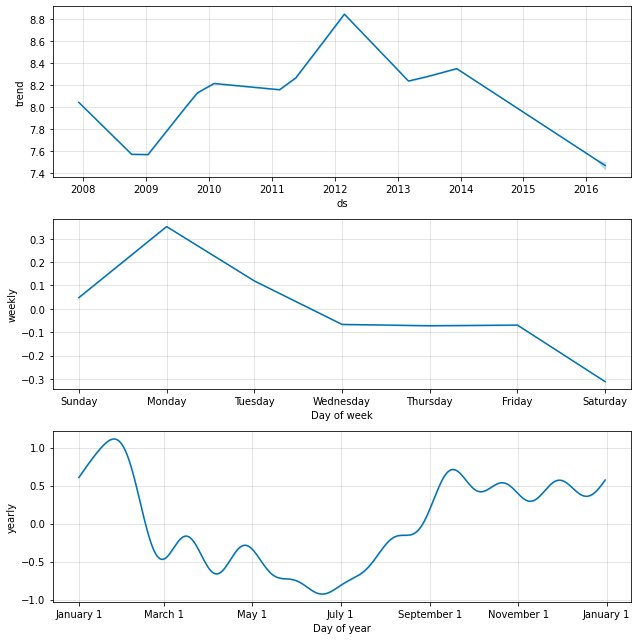

In [15]:
model.plot_components(forecast)

In [16]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [17]:
plot_plotly(model, forecast)

In [18]:
plot_components_plotly(model, forecast)